In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.decomposition import TruncatedSVD

In [3]:
df = pd.read_csv('lender_dataset_sampled.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df = df.dropna(axis=0)

In [5]:
df.shape

(26350, 105)

In [6]:
from sample_lender_pipeline import *

In [7]:
df, X = feature_engineer(df)

In [8]:
df.shape

(26350, 207)

In [9]:
svd = TruncatedSVD(n_components=10).fit(X)

In [10]:
re_X = svd.transform(X)

In [11]:
svd.explained_variance_

array([33.49890518,  8.47637918,  4.13168395,  3.95010405,  3.27385422,
        2.71344551,  2.45975946,  2.40419905,  2.31900424,  2.07622285])

In [12]:
svd.explained_variance_ratio_

array([0.16421032, 0.04155088, 0.02025335, 0.01936326, 0.01604831,
       0.0133012 , 0.01205764, 0.01178529, 0.01136767, 0.01017756])

In [13]:
svd.explained_variance_ratio_.cumsum()

array([0.16421032, 0.2057612 , 0.22601455, 0.24537781, 0.26142611,
       0.27472731, 0.28678496, 0.29857025, 0.30993792, 0.32011548])

In [14]:
re_X.shape

(26350, 10)

In [15]:
from sklearn.manifold import TSNE

In [16]:
from model import *

In [17]:
re_2 = re_X[:,:2]

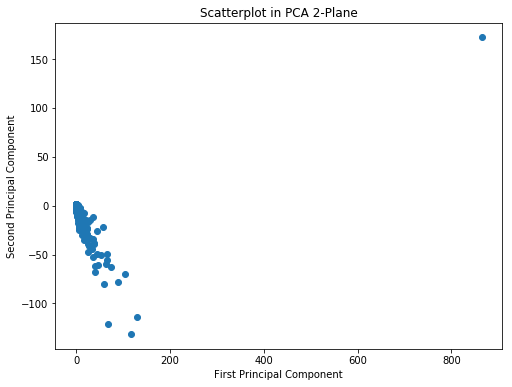

In [32]:
plot_2D_reduced_X(re_2)

In [26]:
re_3 = re_X[:,:3]

In [27]:
re_3.shape

(26350, 3)

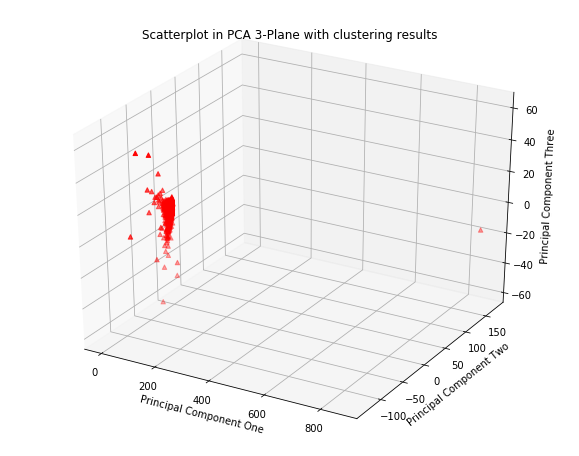

In [28]:
matplotlib_3D_X_reduced(re_3)

In [ ]:
tsne = TSNE(2).fit(X) #computing expensive!

In [ ]:
re_X4 = tsne.transform(X)

In [29]:
from sklearn.manifold import locally_linear_embedding, SpectralEmbedding

In [19]:
from time import time
time0 = time()
X_lle,err = locally_linear_embedding(X,12,2)


In [20]:
time1 = time()

In [22]:
time1-time0

182.75880193710327

In [23]:
X_lle.shape

(26350, 2)

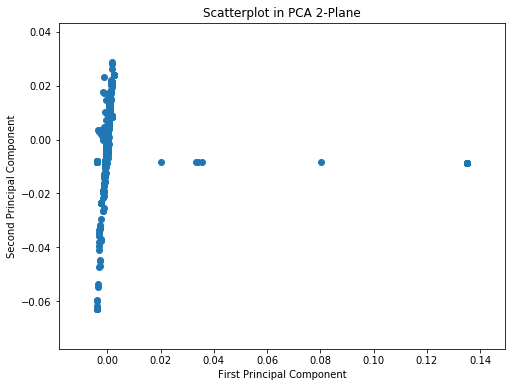

In [24]:
plot_2D_reduced_X(X_lle)

In [25]:
err

3.929746295219356e-18

In [26]:
time0=time()
X_lle3,err3 = locally_linear_embedding(X,12,3)
time1=time()
print(time1-time0)

202.1089789867401


In [44]:
X_lle3.shape

(26350, 3)

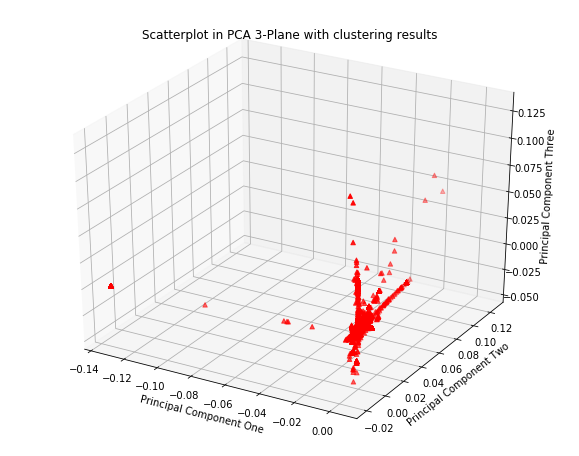

In [27]:
matplotlib_3D_X_reduced(X_lle3) #distance = 12

In [28]:
err3

1.0948161809935328e-17

In [31]:
time0=time()
se = SpectralEmbedding(n_components=2)
re_x2_se = se.fit_transform(X)
time1=time()
print(time1-time0)

MemoryError: 

In [34]:
!htop

>2824   0 4277M  62006  0.1  1h08:58 /Library/Application Su936447M   6643  0.0  1h42:05 com.docker.hyperkit -A 311904282M 40222 0:12.57 /System/Library/Framewo7435817   0 5207M 3891  0.5 14:49.03 /Applications/Google Ch  4317   0 5359M 68966  0.8  1h24:28 /Applications/Google Ch 36454696M 149922  0.2  3:46.65 /System/Library/Input M 53724   0 5178M 24391  0.3 37:05.23 /Applications/Backup an 6124420M 187041  0.2 46:30.82Be Focuse25H5207M 38672 ?  2.4  0.5 14:48.91 /Applications/Google Ch36614 Liyou     5389M 95140 ?  2.2  1.1  4:57.95 /Applications/Google Ch  404 Liyou      17   0 6760M 35560 ?  24 11:24.69 /Applications/Messages.  59324   0 6447M   656 ?  1.9  0.0  1h42:04 com.docker.hyperkit -A 30857 Liyou      17   0 4245M 14628 ?  1.6  0.2  0:19.37 /usr/libexec/secd|4.7881 29.8||50.720.53[2364M ? 26.5  3.27.5373.62, 1984|||  6.5|  443|||  25.84[31G/7.0[35M ? 25.1006117   0 5295M  134M ? 17.4  1.6  2:48.23 /Applications/Google Ch 483137M 66924 ? 10.3  0.8 31:06.73Google Ch31302

In [35]:
def lle_dimensionality_reduction(X, n_neighbors, n_dimensionality):
    time0=time()
    X_lle,err = locally_linear_embedding(X,n_neighbors,n_dimensionality)
    time1=time()
    print(time1-time0)
    return X_lle,err

In [36]:
X3, err33 = lle_dimensionality_reduction(X,20,3)

380.4762978553772


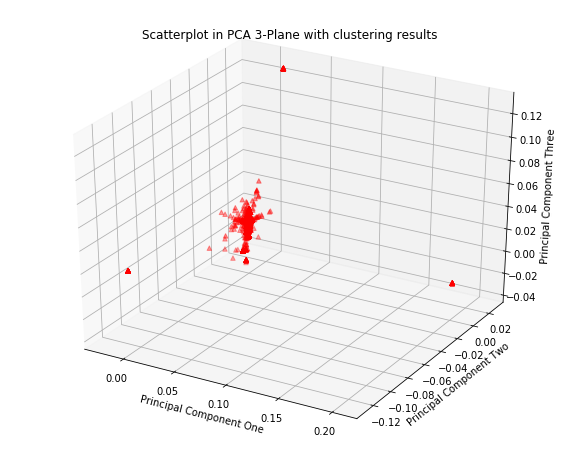

In [38]:
matplotlib_3D_X_reduced(X3)

In [39]:
err33

7.019997616133442e-18

In [40]:
X33, err333 = lle_dimensionality_reduction(X,7,3)

200.3276391029358


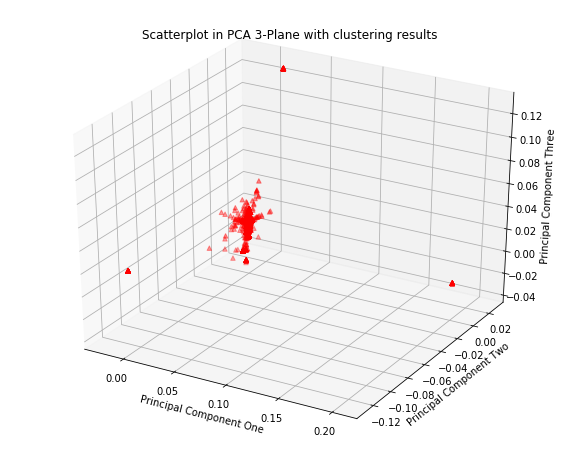

In [38]:
matplotlib_3D_X_reduced(X3) #distance = 20

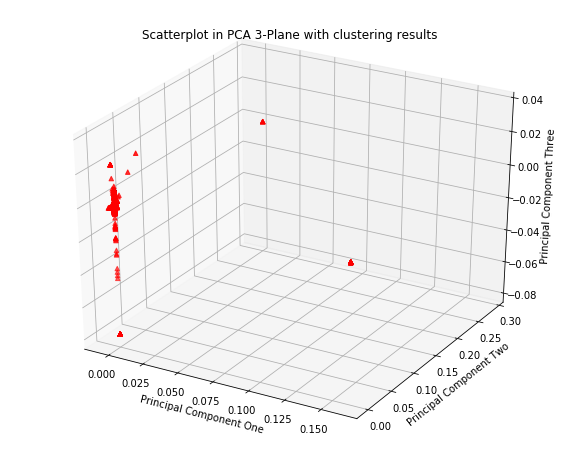

In [41]:
matplotlib_3D_X_reduced(X33) # distance = 7

In [42]:
err333

-1.7175165027143424e-18

## outliers based on LLE2

In [72]:
X_lle.shape

(26350, 2)

In [75]:
idx = np.where(X_lle[:,0]>0.02)

In [76]:
idx

(array([ 6840,  8599,  8627,  8641,  8651,  8812,  9145,  9329,  9749,
         9850, 10166, 10396, 10576, 10677, 10780, 10816, 11182, 11429,
        11528, 11579, 11808, 11924, 11941, 11997, 22708, 23313, 23344,
        23374, 23414, 23445, 23464, 23486, 23569, 23581, 23640, 23665,
        23686, 23714, 23752, 23757, 23810, 23821, 23858, 23871, 23874,
        23964, 23990, 24011, 24015, 24017, 24020, 24044, 24057, 24070,
        24076, 24100, 24159, 24195, 24207]),)

In [77]:
df = drop_outliers(df,idx)

In [78]:
df.shape

(26277, 207)

In [79]:
scaler = StandardScaler()

In [80]:
X_n = scaler.fit_transform(df.values)

In [82]:
re_x2_lle,err_2 = lle_dimensionality_reduction(X_n, 12, 2)

190.8757700920105


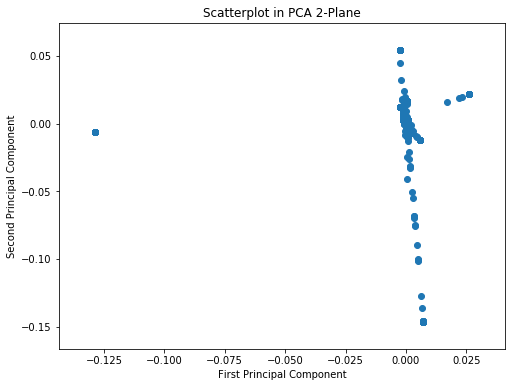

In [83]:
plot_2D_reduced_X(re_x2_lle)

In [85]:
re_lle_pca, impt = PCA_reduce(X_n,3)

#0 Principle Component top 5 contributors are: [53 60 76 75 13]
#1 Principle Component top 5 contributors are: [69 48 45 78 82]
#2 Principle Component top 5 contributors are: [ 0 29 27 20 28]
Reduced X shape: (26277, 3)


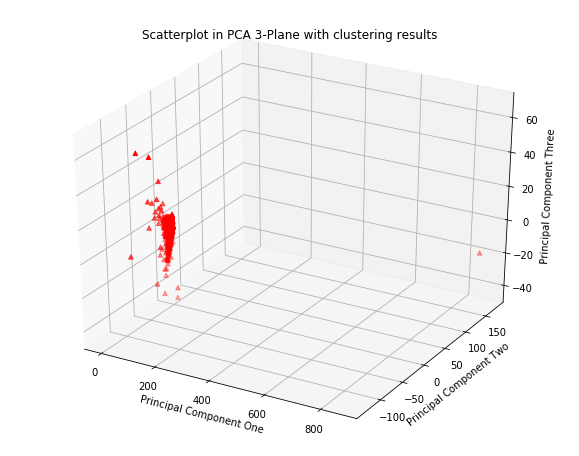

In [86]:
matplotlib_3D_X_reduced(re_lle_pca)

In [71]:
X_lle_n.shape

(26291, 2)

In [49]:
np.argsort(np.abs(X_lle3[:,0]))[-5:]

array([24207,  9850, 10780, 23821, 24015])

In [50]:
np.argsort(np.abs(X_lle3[:,1]))[-5:]

array([ 9992, 16138, 16817, 21080, 19372])

In [51]:
np.argsort(np.abs(X_lle3[:,2]))[-5:]

array([20911, 21080, 20099, 12860, 20024])

In [52]:
df = drop_outliers(df,outlier_index_lst=[24207,  9850, 10780, 23821, 24015,9992, 16138, 16817, 21080, 19372,20911, 21080, 20099, 12860, 20024])

In [53]:
df.shape

(26336, 207)

In [54]:
X_lle31, err31 = lle_dimensionality_reduction(df.values,12,3)

100.6950159072876


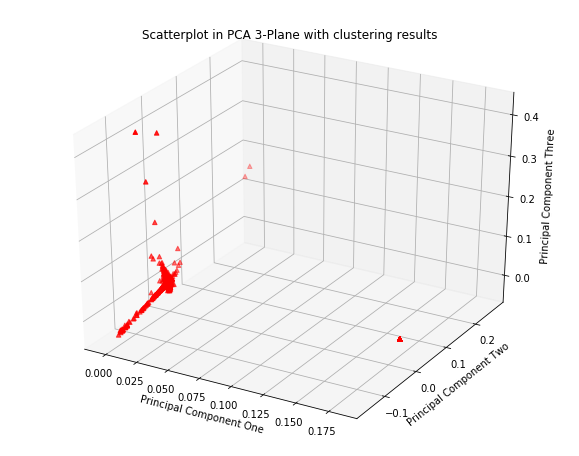

In [55]:
matplotlib_3D_X_reduced(X_lle31)